# Problema 3

Generate 200 points of one period of the sin function. From that data set produce a training
set a test set and a validation set. Design an adequate MLP to solve it and train it with
backpropagation.

No código seguinte são gerados 200 pontos aleatórios e cria-se o conjunto de dados aplicando a função Seno a esses pontos.  

In [35]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers

# Geração dos dados
lista = []

for i in range(0,200):
    n = random.uniform(-np.pi, np.pi)
    lista.append(n)

data = np.sin(lista)

x = pd.DataFrame(lista)
y = pd.DataFrame(data)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)
print(X_train.shape)
print(X_test.shape)

(134, 1)
(66, 1)


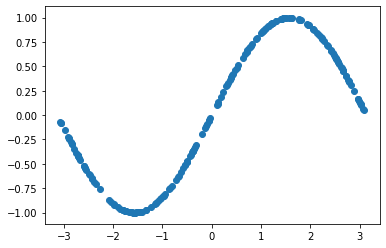

In [36]:
plt.scatter(x, y)
plt.show()

In [37]:
# Iniciar a rede neunonal
network = models.Sequential()

# Adicionar conecções utilizando a função de activação ReLU (Rectified Linear Unit), f(z)= max(0,z)
network.add(layers.Dense(20, input_shape=(1,),activation = 'relu',use_bias = True))
network.add(layers.Dense(units=16, activation="relu",use_bias = True))

# Adicionar conecções utilizando a função de activação sigmoidal
network.add(layers.Dense(units=1, activation="sigmoid",use_bias = True))

# Compilação da rede neuronal
network.compile(loss="mse", 
                optimizer="rmsprop", 
                metrics=["mse"])

# Train neural network
history = network.fit(X_train,y_train, # Dados de treino
epochs=1000, # Númbero de epochs
verbose=0, # sem output
batch_size=400, # Número de observações por batch
validation_data=(X_test, y_test)) # Dados de teste

# Predict classes of test set
predicted_target = network.predict(X_test)

In [38]:
predicted_target[0]

array([1.8226156e-16], dtype=float32)

Text(0.5, 0, 'Epoch')

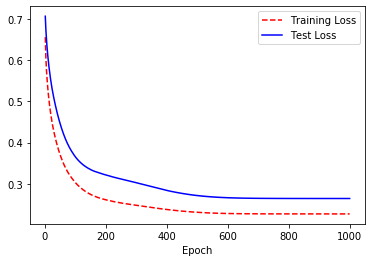

In [39]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")